In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('house.csv')           # importing csv file

In [3]:
df.head()                               # prints first 5 rows 

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape                               # prints dimension of the dataframe

(13320, 9)

# Data Cleaning

In [5]:
df.groupby('area_type').count()       # count the rest of the rows for unique values in the area_type column

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [6]:
df.groupby('area_type')['society'].count()  # count the rows in society column for unique values in the area_type column

area_type
Built-up  Area          1215
Carpet  Area              54
Plot  Area               311
Super built-up  Area    6238
Name: society, dtype: int64

In [7]:
df.groupby('area_type')['area_type'].count()  # counts the unique value in area_type column and print only its counts

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df.groupby('society')['society'].count().head()   # counts the unique value in society column and print only its counts

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
Name: society, dtype: int64

In [9]:
# Dropping the columns area_type, society, balcony, availability 
df2 = df.drop(['area_type', 'society', 'balcony', 'availability'], axis=1)

In [10]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
# prints the count of total null values in all columns
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
b = df.bath.median() # it will eavaluate the median from the bath column

In [13]:
b

2.0

In [14]:
df2.bath.fillna(b, inplace = True)  # it will replace the NaN with median in the bath column

In [15]:
# to check is there any null value is left in the bath column
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [16]:
df2 = df2.dropna()      # dropping NaN from df2 

In [17]:
df2.groupby('size')['size'].count().head()  # it will count the unique value occurence in size column itself

size
1 BHK         538
1 Bedroom     105
1 RK           13
10 BHK          2
10 Bedroom     12
Name: size, dtype: int64

In [18]:
# splits the string into a list of substrings: ['2', 'BHK'].
# selects the first element from the list: '2'.
# int('2') converts the string '2' to an integer: 2.
# Therefore, the value '2' is assigned to the 'bhk' column for the first row.
df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))

In [19]:
df2 = df2.drop(['size'],  axis = 1)   # it will drop the size column

In [20]:
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


# Just for information

In [21]:
# The code you provided calculates the lower bound (lb) and upper bound (ub) for outliers detection based on
# the interquartile range (IQR) of the 'bhk' column in the DataFrame df2.
IQR = df2.bhk.quantile(0.75)-df2.bhk.quantile(0.25)

In [22]:
IQR

1.0

In [23]:
lb = df2.bhk.quantile(0.25)-(1.5*IQR)
ub = df2.bhk.quantile(0.75)+(1.5*IQR)

# Finish

In [24]:
df2.groupby('total_sqft')['total_sqft'].count()   # it will count the unique value occurence in total_sqft column itself

total_sqft
1                1
1.25Acres        1
1.26Acres        1
1000           172
1000 - 1285      1
              ... 
995             10
996              4
997              2
998              1
999              3
Name: total_sqft, Length: 2110, dtype: int64

In [25]:
# its a function to treat total_sqft values like a range we will solve it this way

def sqft_to_num(x) :
    token = x.split('-')
    if len(token) == 2 :
        return (float(token[0])+float(token[1]))/2
    try :
        return float(x)
    except :
        return None
    
# this above code will find a range value separated by (-) and returns the avg of it
# else if it finds the single value then it will convert it into float value
# if it finds any other kind of value then it will replace it with the none.
  

In [26]:
sqft_to_num('1000 - 1285')       # returned with the average of the range

1142.5

In [27]:
sqft_to_num('1.25Acres')         # returned nothing because len of token == 1

In [28]:
df3 = df2.copy()

In [29]:
# it will apply the sqft_to_num function to the total_sqft column
df3['total_sqft'] = df3['total_sqft'].apply(sqft_to_num)

In [30]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [31]:
df3.groupby('total_sqft')['total_sqft'].count()    # it will count the unique value occurence in total_sqft column itself

total_sqft
1.0        1
5.0        1
11.0       1
15.0       1
24.0       1
          ..
30400.0    1
35000.0    1
36000.0    1
42000.0    1
52272.0    1
Name: total_sqft, Length: 1996, dtype: int64

In [32]:
df3[df3.total_sqft == 1000].head()      # it will print the rows in which total_sqf == 1000

,location,total_sqft,bath,price,bhk
12,7th Phase JP Nagar,1000.0,2.0,38.00,2
90,Sanjay nagar,1000.0,2.0,70.00,2
91,Electronic City,1000.0,2.0,28.88,2
143,ISRO Layout,1000.0,2.0,60.00,2
331,Sarjapur Road,1000.0,2.0,67.00,2


In [33]:
df3.isnull().sum()          # it will display the sum of null values columnwise

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

# Feature Engineering

In [34]:
# to create a new column 'price_per_sqft' that divide price in lakhs divided by total_sqft

df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']

In [35]:
df3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [36]:
# it will count sum the unique values in the location column then it will
#  return rows sorted descended
loc = df.groupby('location')['location'].count().sort_values(ascending = False)

In [37]:
loc.head()

location
Whitefield         540
Sarjapur  Road     399
Electronic City    302
Kanakpura Road     273
Thanisandra        234
Name: location, dtype: int64

In [38]:
# it will include locations with a count less than or equal to 10
loc_less_10 = loc[loc <= 10]

In [39]:
loc_less_10.head()

location
Naganathapura           10
Nagadevanahalli         10
Dodsworth Layout        10
Dairy Circle            10
Nagappa Reddy Layout    10
Name: location, dtype: int64

In [40]:
# here we will mark all the locations to 'other' who's count isless than 10

df3['location'] = df3['location']. apply(lambda x : 'other' if x in loc_less_10 else x)

In [41]:
df3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [42]:
# it will count sum the unique values in location column
len(df3.location.unique())

242

#  Outlier Detection/Removal

In [43]:
# to find outlier in bhk 
IQR = df3.bhk.quantile(0.75)-df3.bhk.quantile(0.25)

lb = df3.bhk.quantile(0.25)-(1.5*IQR)
ub = df3.bhk.quantile(0.75)+(1.5*IQR)

In [44]:
lb #(lower bound/range)

0.5

In [45]:
ub #(Upper boound/range)

4.5

In [46]:
# one way of removing outlier is to assume that how big a room can be ex = 300sqft 
# then remove all those entries that has more than 300sqft per room
df3 = df3[~(df3.total_sqft/df3.bhk<300)]
df3. shape

(12559, 6)

In [47]:
df3[(df3.bhk > lb) & (df3.bhk < ub)]

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,112.00,3,6530.612245
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


this dataset excludes all bhk rows that are considered to be an outlier

In [48]:
df3.price_per_sqft.describe()  # provides statistical data about price_per_sqft column

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [49]:
# this function basically removes outliers from price_per_sqft column
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):  # key will contain unique values of location and subdf will contain grouped set of remaining all data based on the unique location that all those data has common.
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out


df4 = remove_pps_outliers(df3)
df4.shape

(10289, 6)

In [50]:
# Another Way To Derive the same output as above withou groupby()

def remove(df):
    df_out = pd.DataFrame()
    unique_locations = df.location.unique()  # Get unique locations
    
    for i in unique_locations:
        subdf = df[df.location == i]  # Filter rows for the current location
        m = np.mean(subdf.price_per_sqft)  # calculate mean
        st = np.std(subdf.price_per_sqft)  # Calculate standard deviation
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]  # Filter outliers
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)  # Concatenate filtered data
    
    return df_out

df4 = remove(df3)
df4.shape

(10289, 6)

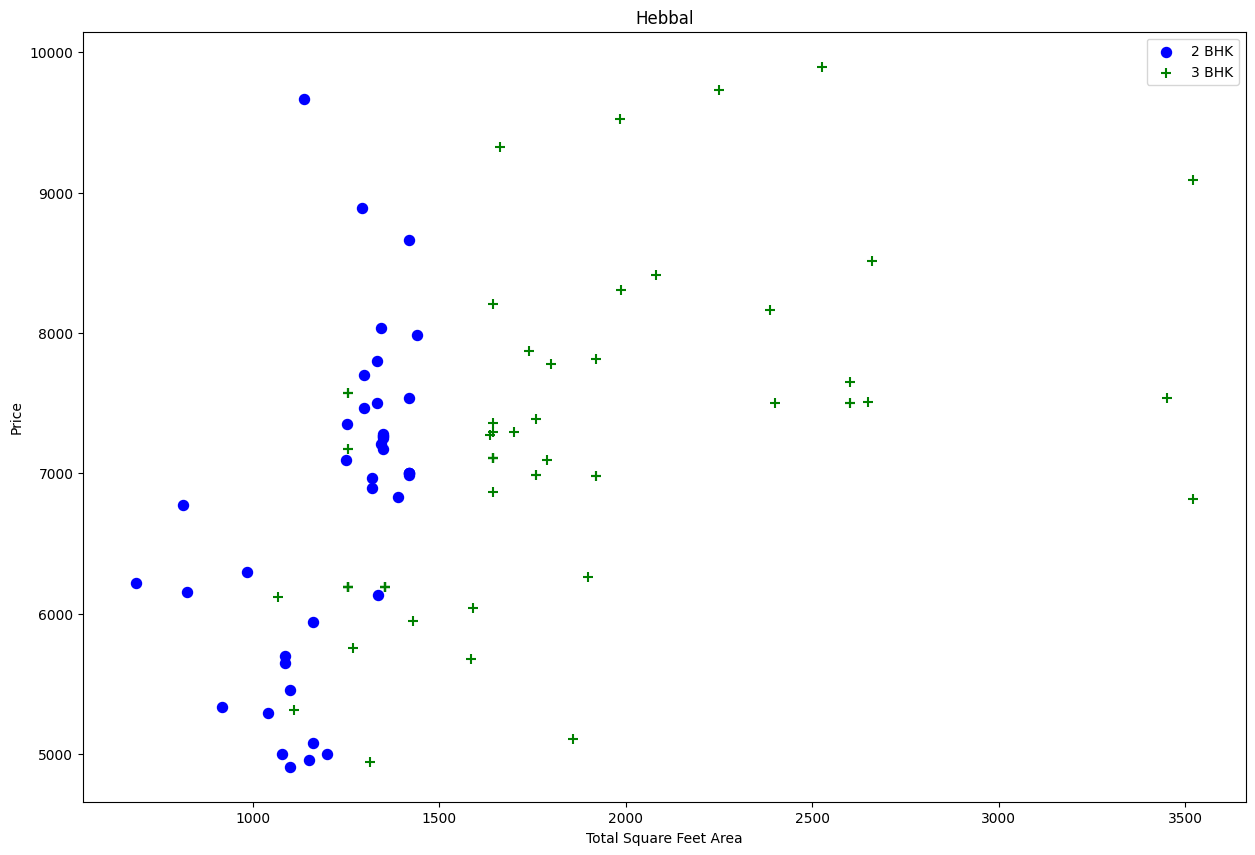

In [51]:
# this function is used to generate scatter plot b/w total square feet and price
import matplotlib.pyplot as plt
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    plt.rcParams['figure.figsize'] = (15, 10)
  
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='blue', label='2 BHK', s=52)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker='+', color='green', label='3 BHK', s=50)
    
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
    plt.show()

plot_scatter_chart(df4, 'Hebbal')

In [52]:
# this function basically removes outliers from bhk column

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    return df.drop(exclude_indices, axis='index')

df5 = remove_bhk_outliers(df4)
df5.shape

(7365, 6)

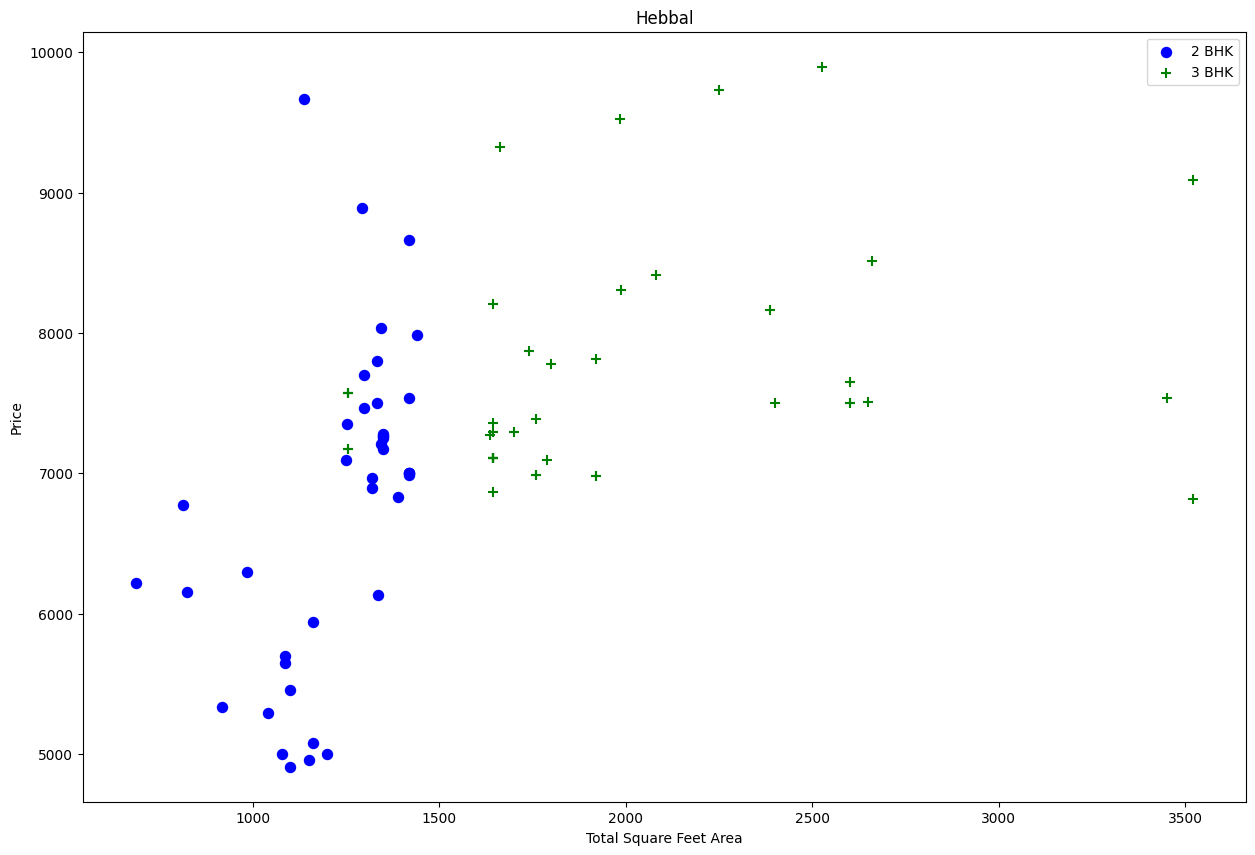

In [53]:
plot_scatter_chart(df5, 'Hebbal')

In [54]:
df5.bhk.quantile(1)

16.0

Text(0, 0.5, 'Count')

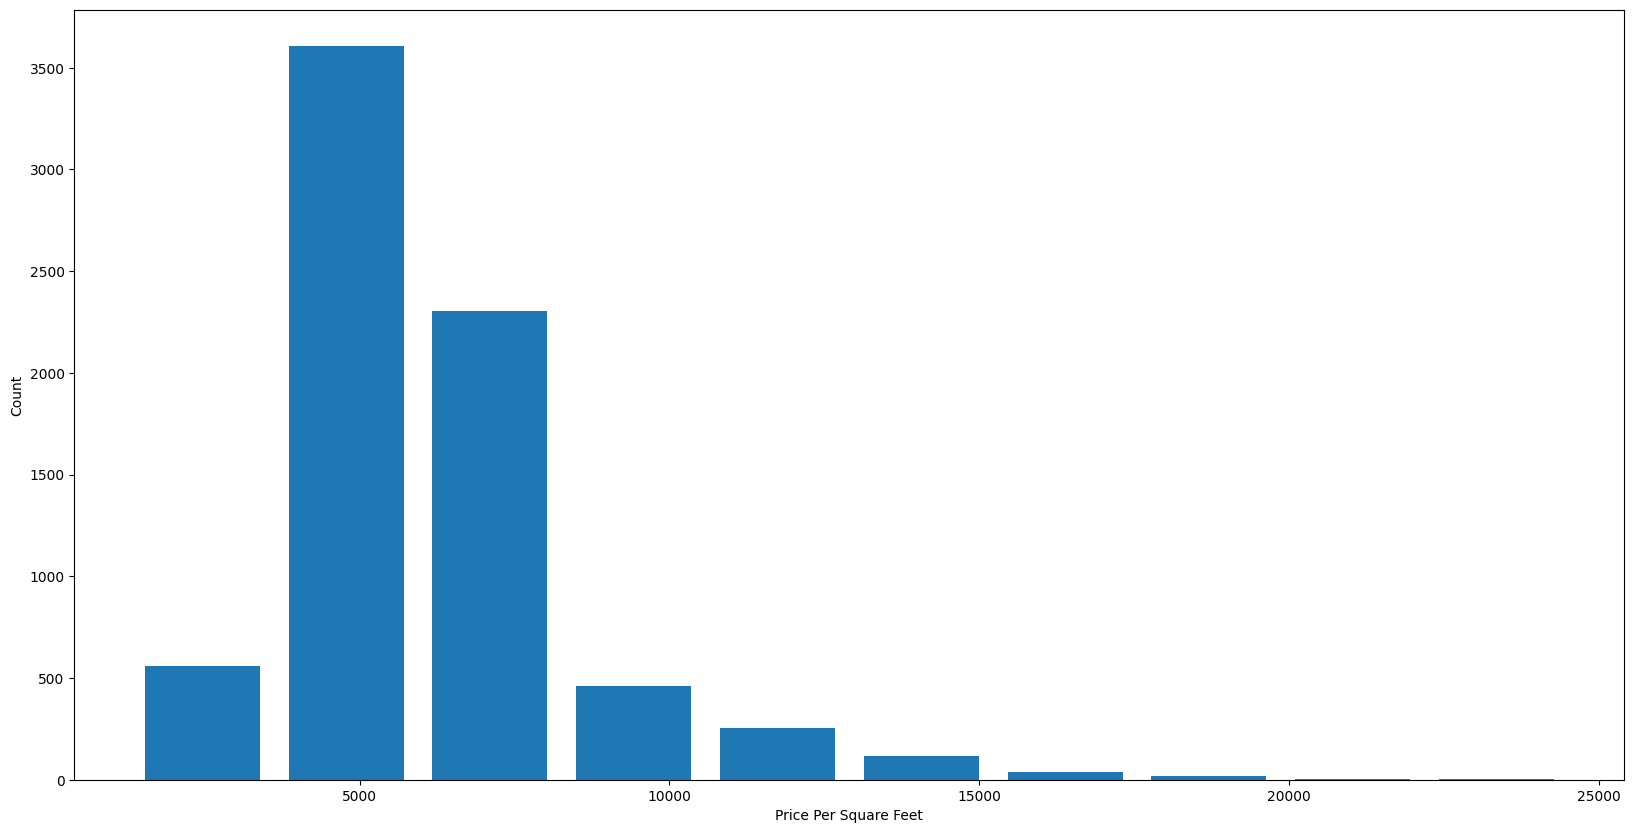

In [55]:
# generating the histogram chart of price_per_sqft
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df5.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")

plt.ylabel ("Count")



In [56]:
df5.bath.unique()    # displaying the unique values in bath column

array([ 2.,  1.,  4.,  3.,  5.,  6.,  8.,  9.,  7., 12., 16., 13.])

In [57]:
df5[df5.bath>10]    # its just displaying rows from bath column which have values greater than 10


,location,total_sqft,bath,price,bhk,price_per_sqft
2107,other,12000.0,12.0,525.0,10,4375.000000
2196,other,10000.0,16.0,550.0,16,5500.000000
2935,other,6000.0,12.0,150.0,11,2500.000000
3267,other,5425.0,13.0,275.0,13,5069.124424
9854,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000


Text(0, 0.5, 'Count')

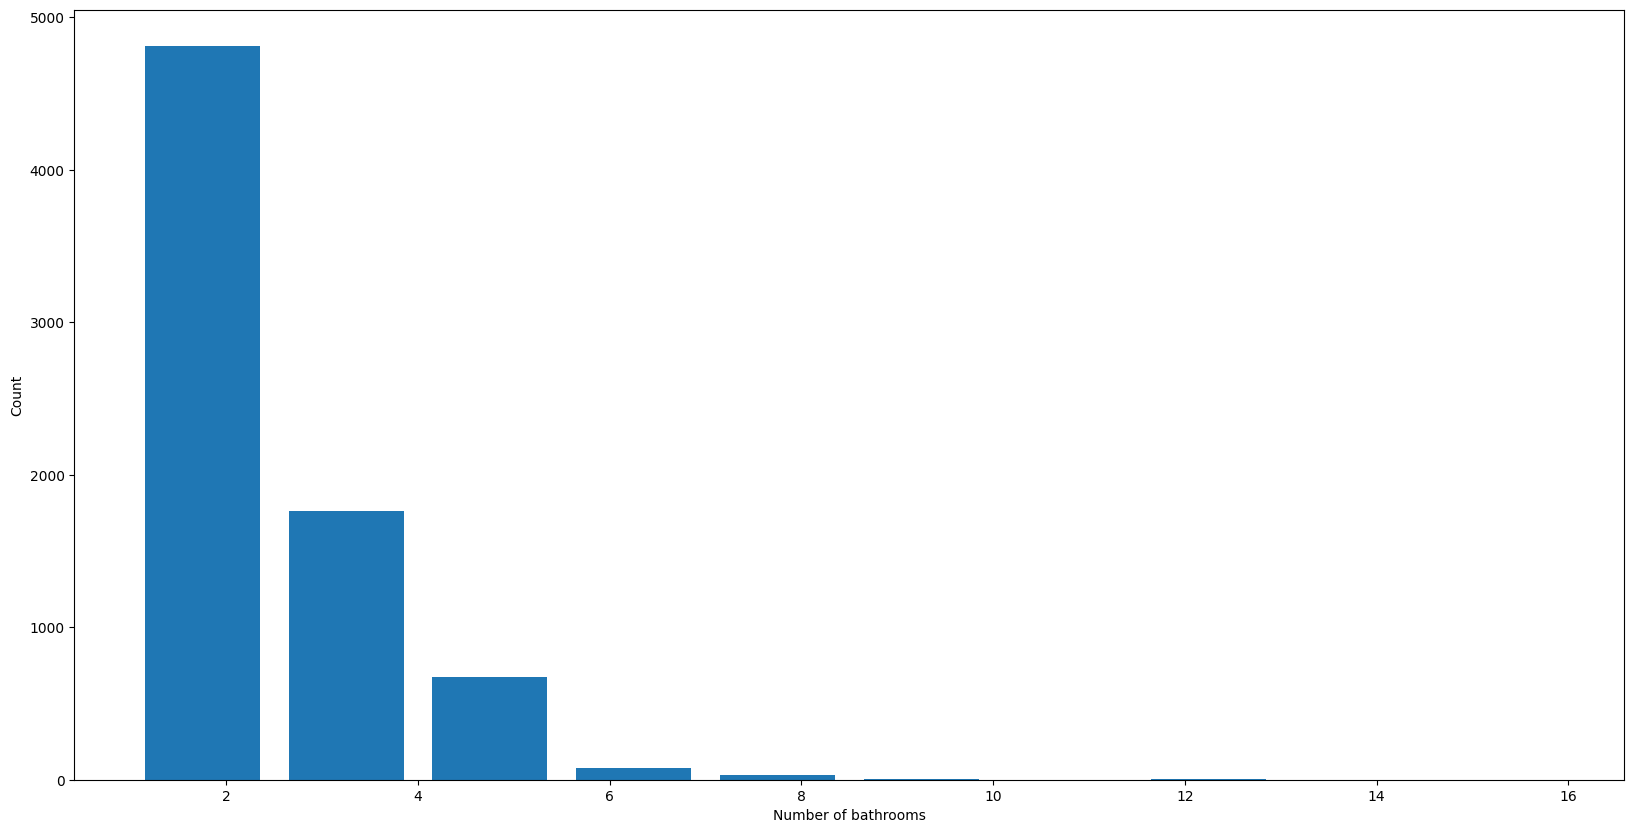

In [58]:
# generating the histogram chart of bath
plt.hist (df5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel ("Count")


In [59]:
# include only the rows where the 'bath' column has a value greater
#  than the sum of the 'bhk' column and 2.
df5[df5.bath > df5.bhk+2]      
# It includes only the rows where the 'bath' column has a value less than the sum of the 'bhk' column and 2.                              
df6 = df5[df5.bath < df5.bhk+2]
df6.shape

(7287, 6)

In [60]:
df7 = df6.drop(['price_per_sqft'] , axis='columns')   # dropping price_per_sqft column
df7.head() 

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Electronic City Phase II,1020.0,2.0,30.60,2
2,Electronic City Phase II,1069.0,2.0,45.00,2
3,Electronic City Phase II,630.0,1.0,28.35,1
5,Electronic City Phase II,1000.0,2.0,25.00,2


# Model Building

In [61]:
df6.groupby('location')['location'].count()  #it will display the count summof unique values from location column itself

location
 Devarachikkanahalli           11
1st Block Jayanagar             7
1st Phase JP Nagar             16
2nd Phase Judicial Layout       8
2nd Stage Nagarbhavi            4
                             ... 
Yelahanka                      86
Yelahanka New Town             24
Yelenahalli                     8
Yeshwanthpur                   37
other                        1144
Name: location, Length: 242, dtype: int64

In [62]:
dummies = pd.get_dummies(df7.location)  #it will make the several columns for boolean reprresentation of location
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# it will join the boolean dataframe of location with original dataframe
df8 = pd.concat([df7,dummies],axis='columns')
df8.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Electronic City Phase II,1020.0,2.0,30.60,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Electronic City Phase II,1069.0,2.0,45.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Electronic City Phase II,630.0,1.0,28.35,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Electronic City Phase II,1000.0,2.0,25.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#  dropping the location column because we already made its boolean columns
df9 = df8.drop('location',axis='columns')
df9.head(5)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1020.0,2.0,30.60,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1069.0,2.0,45.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,630.0,1.0,28.35,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1000.0,2.0,25.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df9.shape

(7287, 246)

In [66]:
# now we sre separating independent variable from the dataframe price is dependent thatswhy we are dropping its column
X = df9.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1020.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1069.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# y is dependent variable for the model
y = df9.price
y.head(3)

0    39.07
1    30.60
2    45.00
Name: price, dtype: float64

In [68]:
# splitting the dataframe for training and testing the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [69]:
# implementing linear regression model
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8840056029083928

# Kfold

In [70]:
# implementing kfold cross validation 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.8092722 , 0.85717369, 0.86425709, 0.83791732, 0.82229337])

# GridSearch

In [71]:
# implementing grid search
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [72]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.15558861816359

In [73]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.62189630467248

In [74]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


186.9430752632319